Library imports

In [ ]:
# Importing necessary libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations
import matplotlib.pyplot as plt   # For creating visualizations
import seaborn as sns # For enhanced visualizations
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.preprocessing import LabelEncoder # For encoding categorical variables
from sklearn.model_selection import train_test_split, cross_val_score, KFold # For splitting data and cross-validation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report # For evaluating model performance
from sklearn.ensemble import RandomForestClassifier # For Random Forest classifier
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting data from the source dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data analysis/hospital_readmissions.csv')

Initial data checking

In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

Let's describe all the attributes in our dataframe

In [ ]:
df.describe(include='all')

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8,8,8,3,3,2,2,2
top,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12382,7824,9056,9107,23625,20938,13497,19228,13246
mean,NaN,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then let's check their data types

In [ ]:
df.dtypes

,0
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object
diag_1,object


In [ ]:
df.shape

(25000, 17)

In [ ]:
X = df.drop('readmitted', axis = 1)
y = df['readmitted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
X_train.shape

(20000, 16)

In [ ]:
X_test.shape

(5000, 16)

In [ ]:
y_train.shape

(20000,)

In [ ]:
y_test.shape

(5000,)

EDA on Data


<Axes: xlabel='readmitted', ylabel='count'>

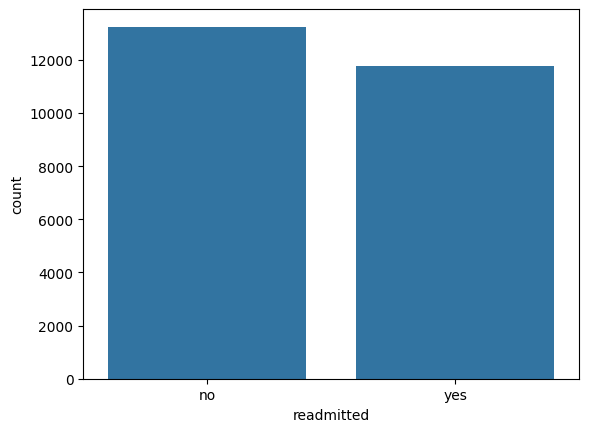

In [ ]:
sns.countplot(data = df, x = 'readmitted')

Analysing the feature variables
age

<Axes: xlabel='age', ylabel='count'>

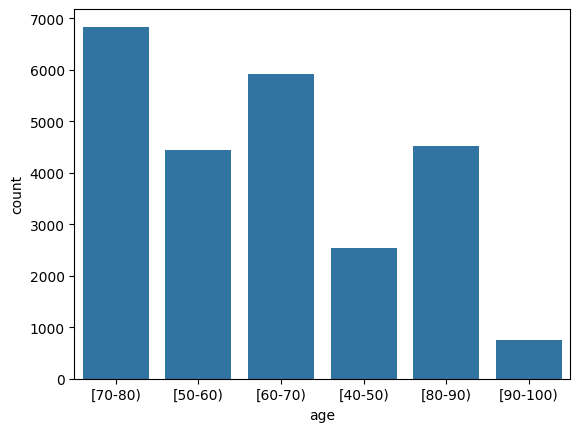

In [ ]:
sns.countplot(data = df, x = 'age')

<Axes: xlabel='time_in_hospital', ylabel='count'>

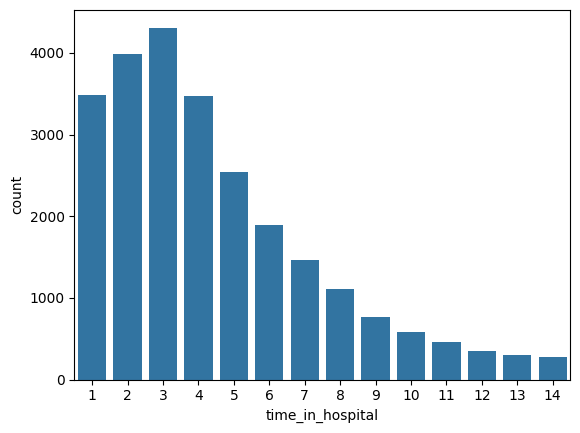

In [ ]:
sns.countplot(data = df, x = 'time_in_hospital')

<Axes: xlabel='n_outpatient', ylabel='count'>

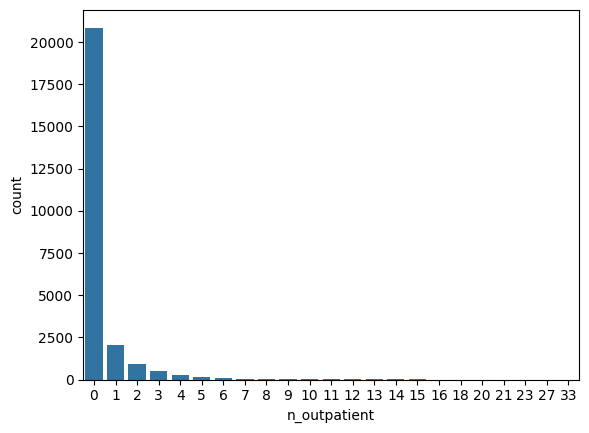

In [ ]:
sns.countplot(data = df, x = 'n_outpatient')

<Axes: xlabel='n_inpatient', ylabel='count'>

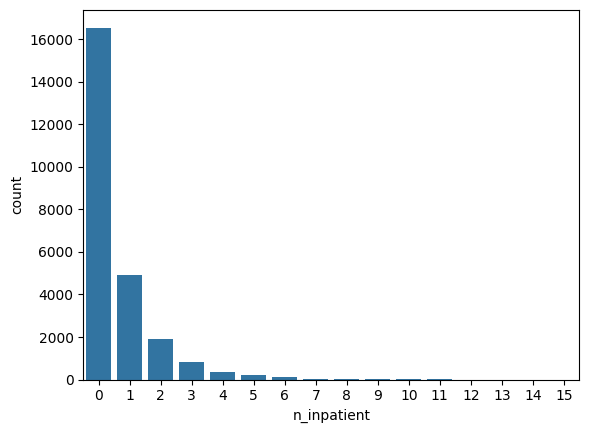

In [ ]:
sns.countplot(data = df, x = 'n_inpatient')

<Axes: xlabel='n_emergency', ylabel='count'>

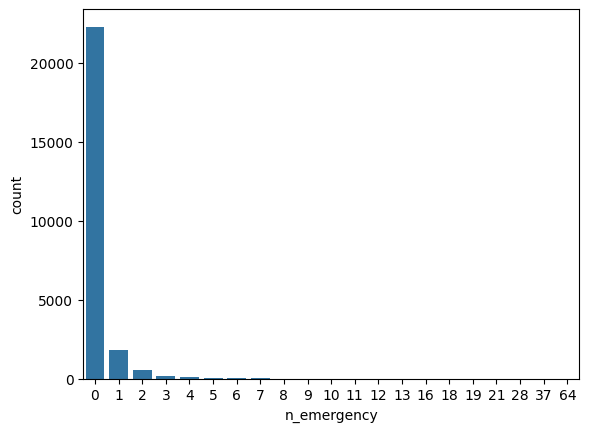

In [ ]:
sns.countplot(data = df, x = 'n_emergency')

<Axes: xlabel='medical_specialty', ylabel='count'>

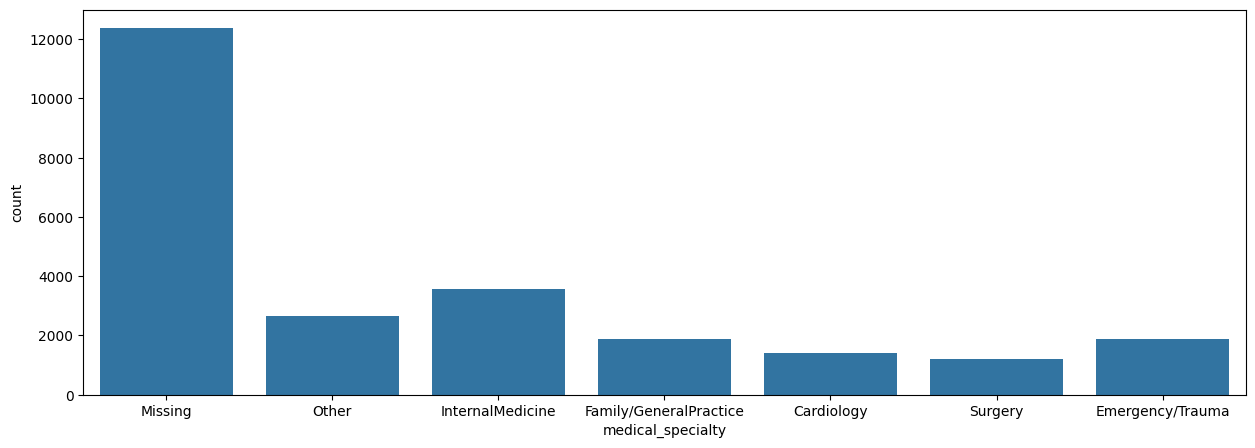

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(data = df, x = 'medical_specialty')

Analysing the relationships between features and target

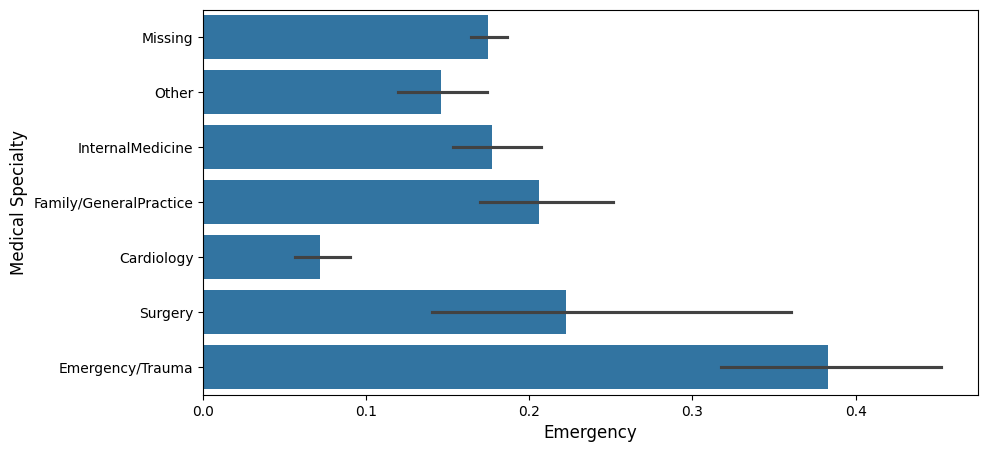

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(x='n_emergency',
y='medical_specialty',
data=df)
plt.xlabel('Emergency', size=12)
plt.ylabel('Medical Specialty', size=12)
plt.show()

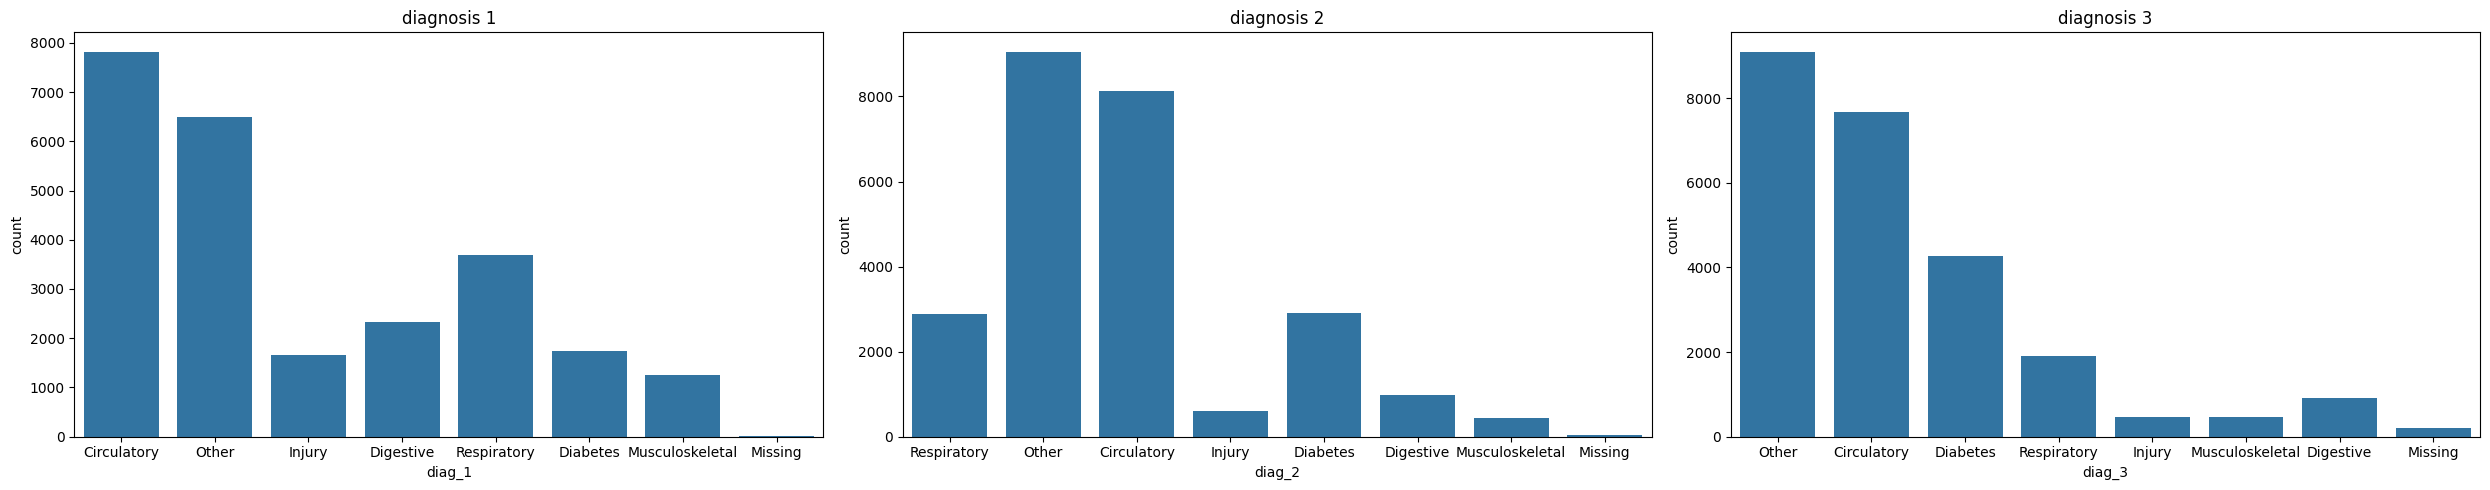

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

sns.countplot(data=df, x='diag_1', ax=axes[0])
axes[0].set_title('diagnosis 1')

sns.countplot(data=df, x='diag_2', ax=axes[1])
axes[1].set_title('diagnosis 2')

sns.countplot(data=df, x='diag_3', ax=axes[2])
axes[2].set_title('diagnosis 3')

plt.tight_layout()
plt.show()


<Axes: xlabel='glucose_test', ylabel='count'>

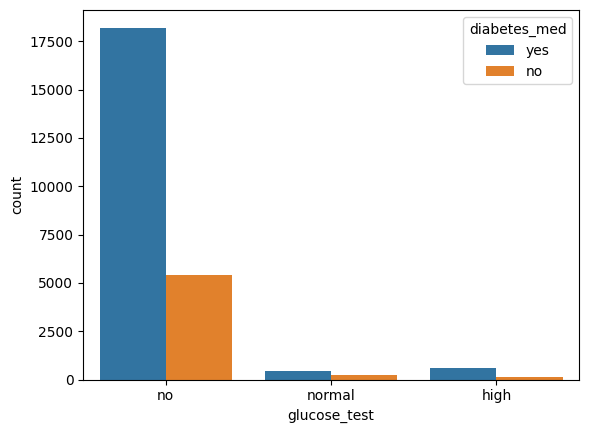

In [ ]:
sns.countplot(data  = df, x = 'glucose_test', hue="diabetes_med")

<Axes: xlabel='age', ylabel='count'>

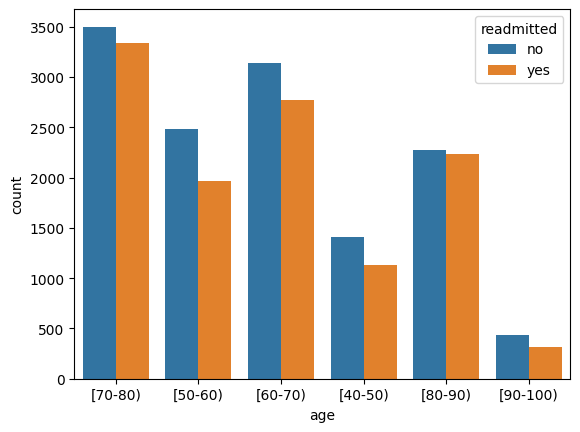

In [ ]:
sns.countplot(data  = df, x = 'age', hue="readmitted")

Pre-processing for training

In [ ]:
df.dtypes

,0
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object
diag_1,object


Label Encoding

Now, let's apply the LabelEncoder and replace method to the categorical columns that contains string values. This will help us encode these columns into numerical representations for the further analysis.

In [ ]:
df['age'] = df['age'].replace('[70-80)', 0)
df['age'] = df['age'].replace('[50-60)', 1)
df['age'] = df['age'].replace('[60-70)', 2)
df['age'] = df['age'].replace('[40-50)', 3)
df['age'] = df['age'].replace('[80-90)', 4)
df['age'] = df['age'].replace('[90-100)', 5)

/tmp/ipython-input-16-816210288.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('[90-100)', 5)


In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,0,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,0,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,2,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
df.describe(include='all')

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8,8,8,3,3,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12382,7824,9056,9107,23625,20938,13497,19228,13246
mean,1.827520,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.528458,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.000000,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='age', ylabel='count'>

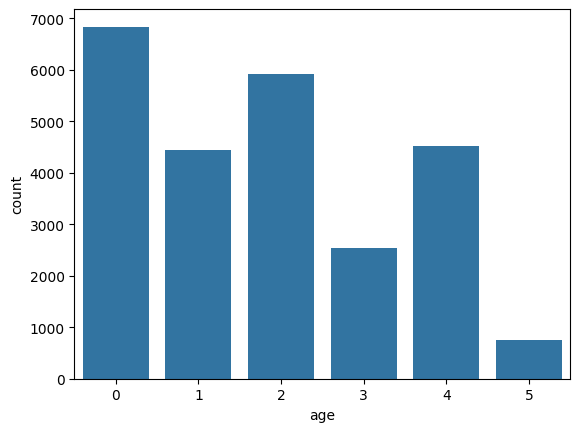

In [ ]:
sns.countplot(data = df, x = 'age')

<Axes: xlabel='diag_1', ylabel='count'>

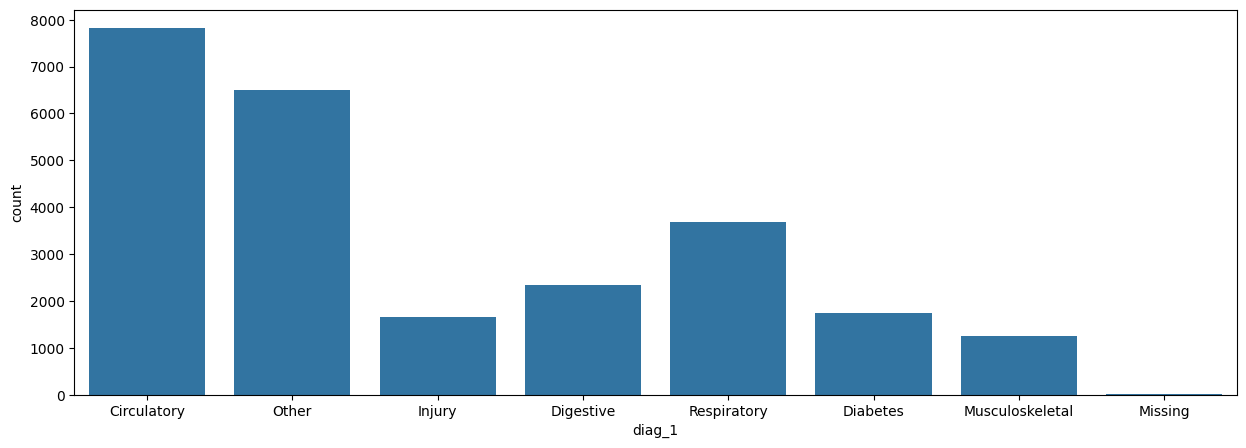

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(data = df, x = 'glucose_test')

In [ ]:
df['diag_1'] = df['diag_1'].replace('Circulatory', 0)
df['diag_1'] = df['diag_1'].replace('Other', 1)
df['diag_1'] = df['diag_1'].replace('Injury', 2)
df['diag_1'] = df['diag_1'].replace('Digestive', 3)
df['diag_1'] = df['diag_1'].replace('Respiratory', 4)
df['diag_1'] = df['diag_1'].replace('Diabetes', 5)
df['diag_1'] = df['diag_1'].replace('Musculoskeletal', 6)
df['diag_1'] = df['diag_1'].replace('Missing', 6)

/tmp/ipython-input-17-2032457808.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diag_1'] = df['diag_1'].replace('Missing', 6)


In [ ]:
df.drop('change',  axis=1, inplace = True)


In [ ]:
df['diag_2'] = df['diag_2'].replace('Circulatory', 0)
df['diag_2'] = df['diag_2'].replace('Other', 1)
df['diag_2'] = df['diag_2'].replace('Injury', 2)
df['diag_2'] = df['diag_2'].replace('Digestive', 3)
df['diag_2'] = df['diag_2'].replace('Respiratory', 4)
df['diag_2'] = df['diag_2'].replace('Diabetes', 5)
df['diag_2'] = df['diag_2'].replace('Musculoskeletal', 6)
df['diag_2'] = df['diag_2'].replace('Missing', 6)

/tmp/ipython-input-20-2889535617.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diag_2'] = df['diag_2'].replace('Missing', 6)


In [ ]:
df['diag_3'] = df['diag_3'].replace('Circulatory', 0)
df['diag_3'] = df['diag_3'].replace('Other', 1)
df['diag_3'] = df['diag_3'].replace('Injury', 2)
df['diag_3'] = df['diag_3'].replace('Digestive', 3)
df['diag_3'] = df['diag_3'].replace('Respiratory', 4)
df['diag_3'] = df['diag_3'].replace('Diabetes', 5)
df['diag_3'] = df['diag_3'].replace('Musculoskeletal', 6)
df['diag_3'] = df['diag_3'].replace('Missing', 6)

/tmp/ipython-input-21-2838874807.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diag_3'] = df['diag_3'].replace('Missing', 6)


<Axes: xlabel='readmitted', ylabel='count'>

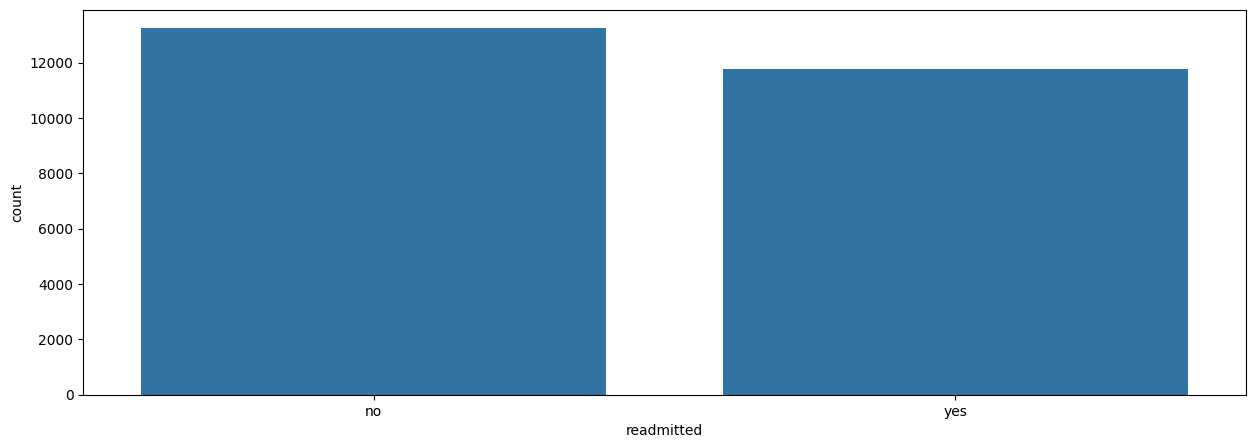

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(data = df, x = 'readmitted')

In [ ]:
df['glucose_test'] = df['glucose_test'].replace('no', 0)
df['glucose_test'] = df['glucose_test'].replace('normal', 1)
df['glucose_test'] = df['glucose_test'].replace('high', 2)

/tmp/ipython-input-23-2283888174.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['glucose_test'] = df['glucose_test'].replace('high', 2)


In [ ]:
df['A1Ctest'] = df['A1Ctest'].replace('no', 0)
df['A1Ctest'] = df['A1Ctest'].replace('normal', 1)
df['A1Ctest'] = df['A1Ctest'].replace('high', 2)

/tmp/ipython-input-25-1956516750.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Ctest'] = df['A1Ctest'].replace('high', 2)


In [ ]:
df['diabetes_med'] = df['diabetes_med'].replace('yes', 0)
df['diabetes_med'] = df['diabetes_med'].replace('no', 1)

/tmp/ipython-input-28-1180733178.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetes_med'] = df['diabetes_med'].replace('no', 1)


In [ ]:
df['readmitted'] = df['readmitted'].replace('no', 0)
df['readmitted'] = df['readmitted'].replace('yes', 1)

/tmp/ipython-input-30-628852605.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('yes', 1)


In [ ]:
df.dtypes

,0
age,int64
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
diag_1,int64
diag_2,int64


Checking Missing Data in the Training set

In [ ]:
df.isnull().sum()

,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
diag_1,0
diag_2,0


Model training
Creating a train / test split

In [ ]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,diag_3,glucose_test,A1Ctest,diabetes_med
23311,1,3,67,0,12,0,1,0,5,0,0,0,1,0
23623,1,1,3,2,16,0,0,0,6,5,1,0,0,0
1020,1,2,31,1,19,1,2,0,4,0,1,0,0,1
12645,4,2,43,2,9,0,0,0,1,3,1,0,0,0
1533,2,7,35,1,21,1,5,3,4,0,4,0,0,0


In [ ]:
clf_rf = RandomForestClassifier(n_estimators=200)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = clf_rf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.604


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2658
           1       0.59      0.51      0.55      2342

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



Handling Imbalanced dataset
imbalanced-learn library (imblearn) in conjunction with scikit-learn to perform over-sampling and under-sampling.

imbalanced-learn provides various techniques for handling imbalanced datasets. Building a model after removing the imbalanced data also with StandardScaler.

In [ ]:
df['readmitted'].value_counts()

,count
readmitted,
0,13246
1,11754


In [ ]:
df.groupby('readmitted').mean()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,diag_3,glucose_test,A1Ctest,diabetes_med
readmitted,,,,,,,,,,,,,,
0,1.831874,4.331345,42.625245,1.424204,15.972445,0.258871,0.380190,0.108561,1.903669,1.709120,1.857164,0.076551,0.284690,0.255549
1,1.822614,4.590778,43.934405,1.271397,16.567892,0.487579,0.881657,0.274545,1.922069,1.645738,1.791220,0.089076,0.265271,0.203080


In [ ]:
X = df.drop('readmitted', axis = 1)
y = df['readmitted']

In [ ]:
X.shape

(25000, 14)

In [ ]:
y.shape

(25000,)

In [ ]:
y.value_counts()

,count
readmitted,
0,13246
1,11754


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

In [ ]:
X.shape

(26492, 14)

In [ ]:
y.shape

(26492,)

In [ ]:
counter = Counter(y)

In [ ]:
print (counter)

Counter({0: 13246, 1: 13246})


In [ ]:
y.value_counts()

,count
readmitted,
0,13246
1,13246


In [ ]:
X.shape

(26492, 14)

In [ ]:
X.head(2)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,diag_3,glucose_test,A1Ctest,diabetes_med
0,0,8,72,1,18,2,0,0,0,4,1,0,0,0
1,0,3,34,2,13,0,0,0,1,1,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [ ]:
X_train.shape

(19869, 14)

In [ ]:
X_test.shape

(6623, 14)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.53394035, -0.81264821,  0.39076895, ..., -0.22838614,
        -0.41986269, -0.53130463],
       [ 0.12060437, -1.14649515,  0.13748428, ..., -0.22838614,
        -0.41986269, -0.53130463],
       [ 1.4296938 , -0.81264821,  0.39076895, ..., -0.22838614,
         2.67616694, -0.53130463],
       ...,
       [-1.18848506, -0.47880127, -1.53419453, ..., -0.22838614,
        -0.41986269, -0.53130463],
       [ 0.12060437,  1.19043343,  0.74536748, ..., -0.22838614,
         2.67616694, -0.53130463],
       [ 0.12060437, -1.14649515,  0.08682735, ..., -0.22838614,
        -0.41986269, -0.53130463]])

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=200)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = clf_rf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.6152800845538275


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      3327
           1       0.61      0.61      0.61      3296

    accuracy                           0.62      6623
   macro avg       0.62      0.62      0.62      6623
weighted avg       0.62      0.62      0.62      6623

